Fitness app wants to know their customers very well so they add  a survey within the sign up process to better know each user's behavioral data, however there are many users and they are not grouped yet, and Fitness app  need to group the users based on commonality characteristics.

In [63]:
! pip install scikit-learn-extra

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids 

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('fitness.csv')
df.set_index('athlete_id')

,age,gender,height_cm,weight_kg,monthly_income_usd,previously_joined_gym,exercise_plan,balanced_diet,athletics_food_supplements,medical_limitations,smoker,sleeping_habits,workout_prefer_time,frequency_of_play_sports,regular_exercise,preferred_sports,level_of_fittness,motivation_for_workingout
athlete_id,,,,,,,,,,,,,,,,,,
123944,23,F,173,82,8265,no,no,yes,yes,no,True,night regularly,AM,Once per week,In a pair,Swimming,Good,3.0
125052,37,F,189,85,120861,no,no,yes,yes,no,True,night regularly,AM,Every other day,In a pair,Running,Average,3.0
386,34,F,173,68,72294,yes,yes,yes,sometimes,no,False,less than 8 hrs,AM,Every day,In a pair,Running,Perfect,4.5
124302,32,F,155,64,92236,yes,no,yes,yes,no,True,less than 8 hrs,AM,Every day,As a group,Riding a bike,Good,3.0
435,25,F,170,66,79764,yes,yes,yes,sometimes,no,False,night regularly,AM,Every day,As a group,Swimming,Perfect,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122426,25,M,161,52,54209,yes,yes,yes,yes,no,False,night regularly,AM,Once per week,In a pair,Riding a bike,Perfect,3.5
123190,20,F,151,60,14490,yes,no,no,sometimes,no,True,less than 8 hrs,AM,Every other day,As a group,Swimming,Average,3.5
125094,39,F,192,88,104775,no,no,no,yes,no,False,less than 8 hrs,AM,Every other day,Alone,Running,Good,4.0


In [4]:
df.shape

(5423, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5423 entries, 0 to 5422
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   athlete_id                  5423 non-null   int64  
 1   age                         5423 non-null   int64  
 2   gender                      5423 non-null   object 
 3   height_cm                   5423 non-null   int64  
 4   weight_kg                   5423 non-null   int64  
 5   monthly_income_usd          5423 non-null   int64  
 6   previously_joined_gym       5423 non-null   object 
 7   exercise_plan               5423 non-null   object 
 8   balanced_diet               5423 non-null   object 
 9   athletics_food_supplements  5423 non-null   object 
 10  medical_limitations         5423 non-null   object 
 11  smoker                      5423 non-null   bool   
 12  sleeping_habits             5423 non-null   object 
 13  workout_prefer_time         5423 

**Overview**

- There're 10,000 observations, 18 features.
- 12 categorical variables, 6 numerical variables, 1 boolean variable.

##  1. Data Preprocessing and Exploratory Data Analysis (EDA)

### 1. EDA

**Summary Statistics**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,5423.0,103422.897658,45770.772484,111.0,122374.5,123738.0,125032.5,126452.0
age,5423.0,27.572193,7.745318,18.0,22.0,26.0,32.0,54.0
height_cm,5423.0,169.518532,12.352306,150.0,159.0,169.0,177.0,199.0
weight_kg,5423.0,72.574959,12.975456,49.0,65.0,69.0,79.0,116.0
monthly_income_usd,5423.0,51962.725060,34578.564354,43.0,16758.0,58901.0,79741.5,125960.0
motivation_for_workingout,5423.0,3.259174,1.102166,1.0,3.0,3.5,4.0,4.5


**Insights**

- The average age is approx **28 years old**.
- The average height is **169 cm**.
- The average weight is **72 kg**.
- The average motivation for working out score is **3**.
- The average of monthly income is **51962.72 USD**.

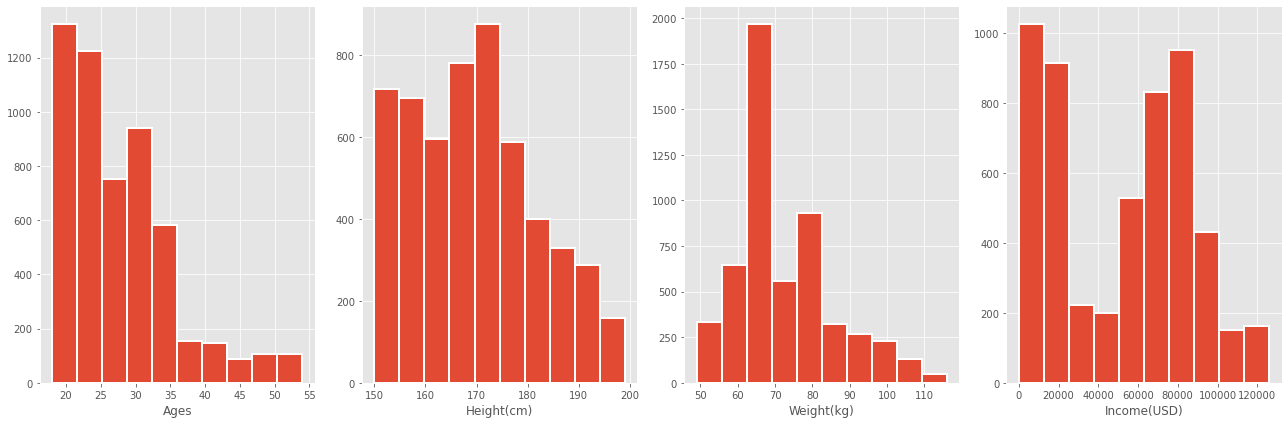

In [7]:
#pattern recognition
fig , (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1,ncols=4, figsize=(18,6))

ax1.hist(df['age'], edgecolor='white', linewidth=2)

ax1.set_xlabel('Ages')


ax2.hist(df['height_cm'], edgecolor='white', linewidth=2)

ax2.set_xlabel('Height(cm)')

ax3.hist(df['weight_kg'], edgecolor='white', linewidth=2)

ax3.set_xlabel('Weight(kg)')


ax4.hist(df['monthly_income_usd'], edgecolor='white', linewidth=2)

ax4.set_xlabel('Income(USD)')

plt.tight_layout()
plt.show()

**Insights**

- Age is approx right-skewed distribution, most people are in their twenties or thirties..

- Also, height(cm) and monthly income are bimodal distribution, where a lot of people's height is from **150 - 155 cm or 165 - 175 cm**, and most of them have a monthly income between approx **no income - 20000 USD or 65000 - 90000 USD**..

- Weight (kg) is approx normally distributed, most of people's weight is between **60 - 70 kg**..

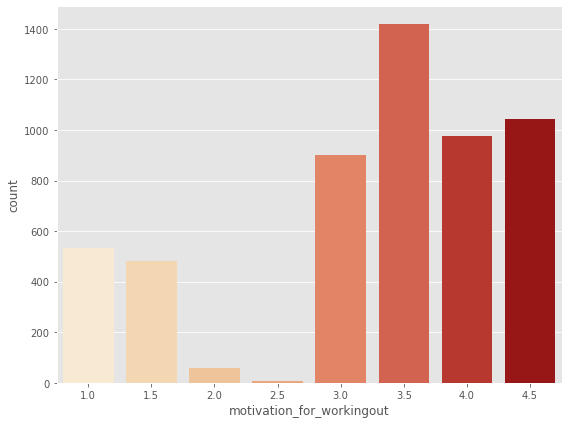

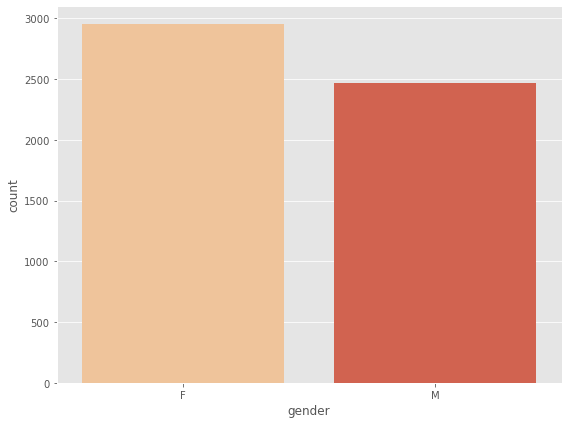

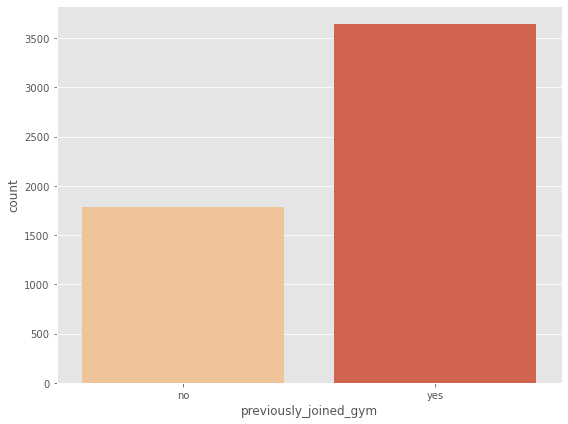

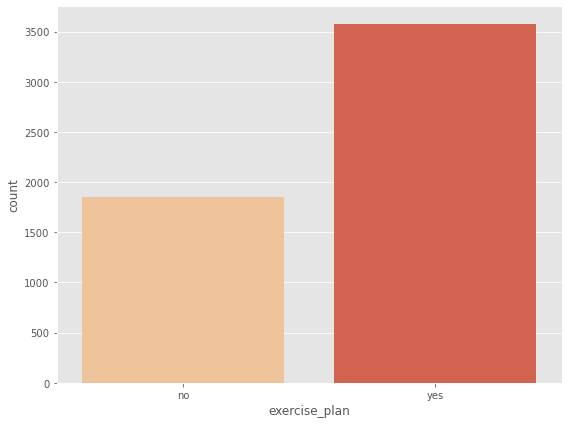

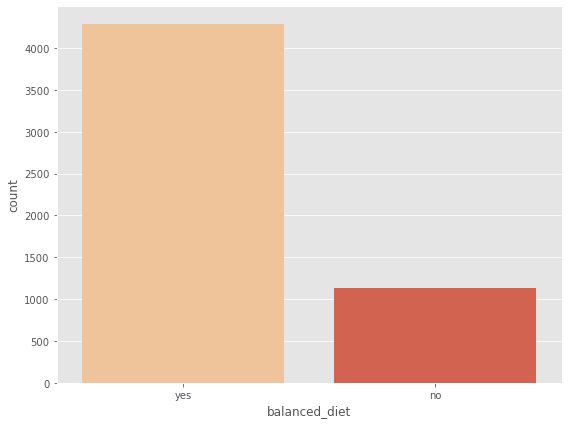

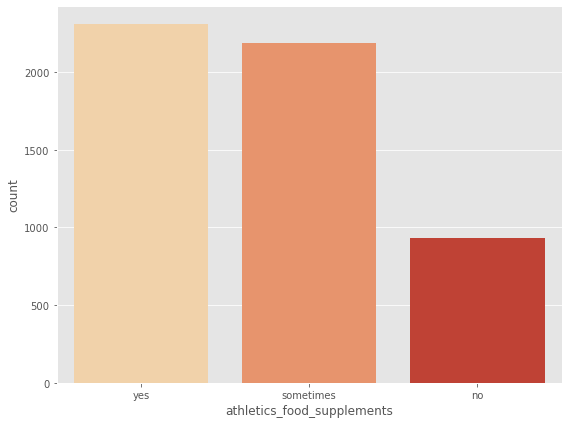

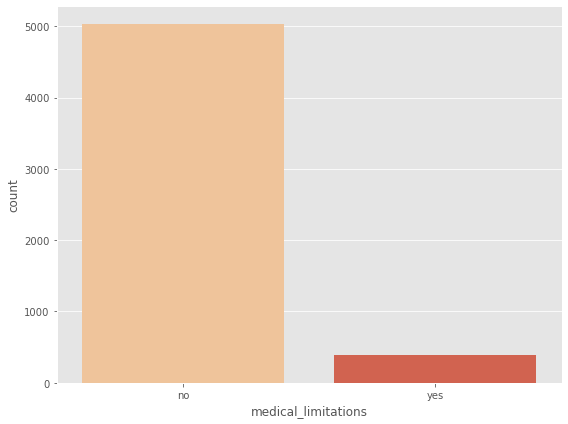

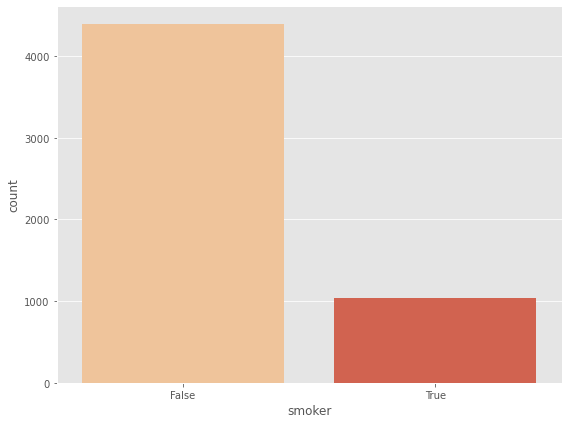

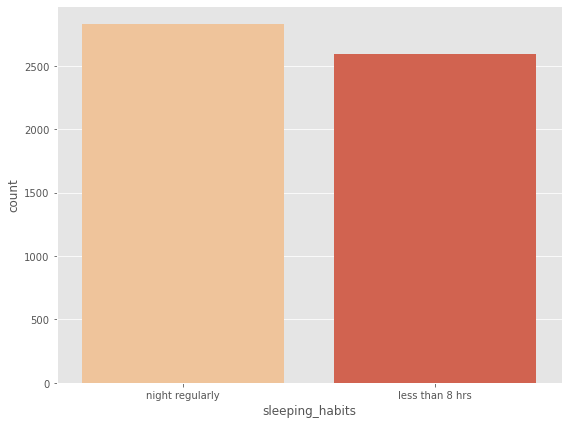

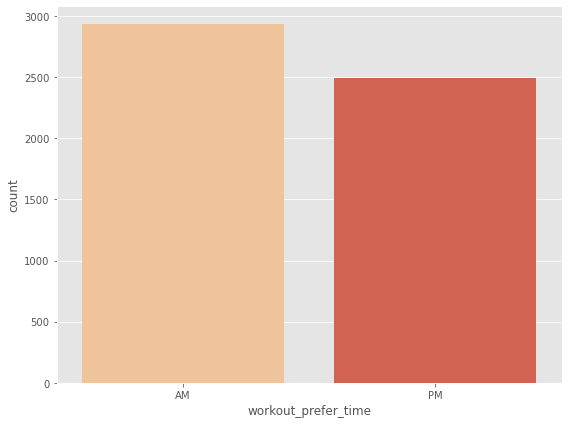

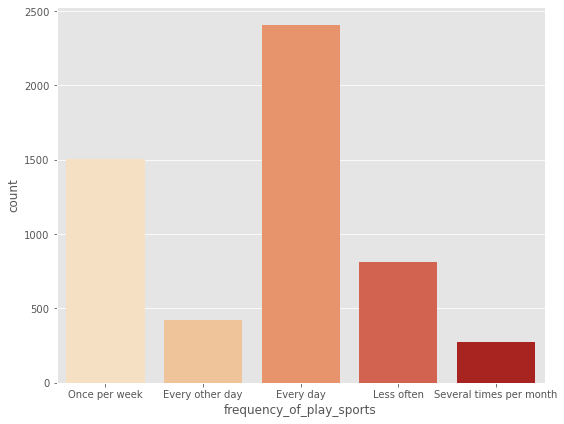

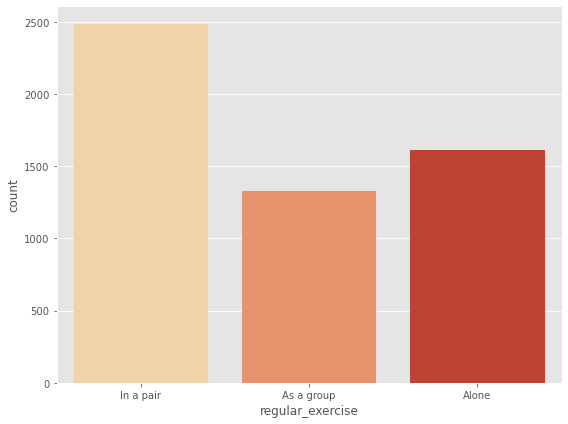

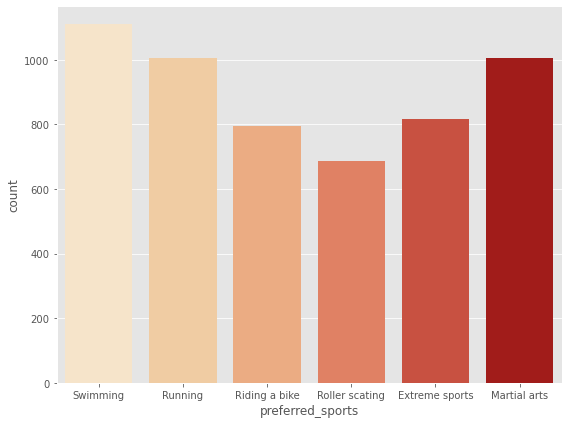

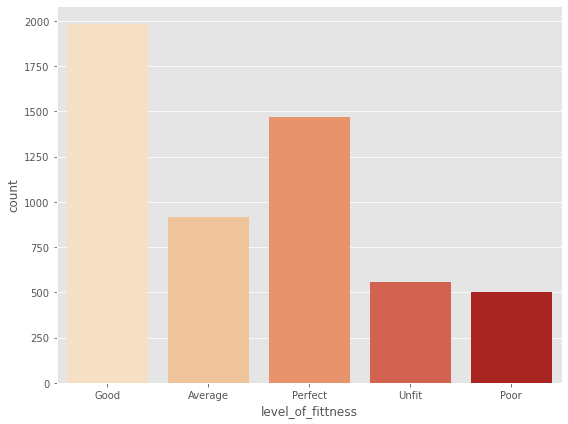

In [8]:
cols_list = ['motivation_for_workingout', 'gender', 'previously_joined_gym', 'exercise_plan',
             'balanced_diet', 'athletics_food_supplements', 'medical_limitations', 'smoker',
             'sleeping_habits', 'workout_prefer_time', 'frequency_of_play_sports', 'regular_exercise',
             'preferred_sports', 'level_of_fittness']

for col in cols_list:
    plt.figure(figsize=(8,6))
    sns.countplot(x = col, data = df, palette='OrRd')
    plt.tight_layout()
    plt.show()

**Insights**
- Most people rated their motivation for workout **3.5**.
- The females are more than the males in this dataset.
- A lot of people said yes they have gone to the gym before.
- Most people followed an exercise plan before.
- Most people followed a balanced diet.
- A lot of people said yes, they eat athletics food supplements and the other said sometimes they did it.
- Most people in this dataset don't have medical limitations.
- The number of smokers is less than the non-smokers.
- A lot of people tend to sleep regularly at night.
- More people prefer morning time to exercise rather than the evening.
- A lot of people work out everyday.
- More people prefer to exercise with a partner.
- Most people prefer swimming, running or martial arts as their favorite kind of sport.
- A lot of people have a good level of fitness in this dataset.

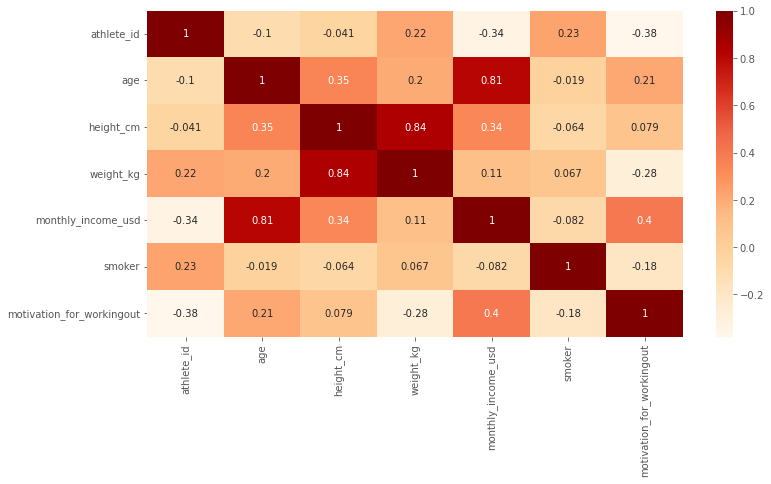

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='OrRd')
plt.show()

**Insights**

- A coefficient of  **0.84** means the weight (kg) and height (cm) both have strong positive associations. the weight increases as the height increases as well..
- Also, a coefficient of **0.81** means the age and monthly income both have strong positive associations. It seems when a person gets old, their income increases too..
- Otherwise, Most of the variables have weak correlations with the other variables, or highly uncorrelated..

### 2. Data Preprocessing

**Encoding categorical variables**

- Since the PCA only processes the numeric features, rather than just dropping these categorical features and we may end up losing information, we can encode them into a more readable format..

In [11]:
df1 = df.copy()

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

In [13]:
df['previously_joined_gym_encoded'] = label_encoder.fit_transform(df['previously_joined_gym'])

In [14]:
df['level_of_fittness_encoded'] = label_encoder.fit_transform(df['level_of_fittness'])

In [15]:
df['frequency_of_work_out_encoded'] = label_encoder.fit_transform(df['frequency_of_play_sports'])

In [16]:
df['followed_exercise_plan_before_encoded'] = label_encoder.fit_transform(df['exercise_plan'])

In [17]:
df['preferred_sports_encoded'] = label_encoder.fit_transform(df['preferred_sports'])

In [18]:
df['preferred_exercise_encoded'] = label_encoder.fit_transform(df['regular_exercise'])

In [19]:
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

In [20]:
df['medical_limitations_encoded'] = label_encoder.fit_transform(df['medical_limitations'])

In [21]:
df['balanced_diet_encoded'] = label_encoder.fit_transform(df['balanced_diet'])

In [22]:
df['athletics_food_supplements_encoded'] = label_encoder.fit_transform(df['athletics_food_supplements'])

In [23]:
df['preferred_workout_time_encoded'] = label_encoder.fit_transform(df['workout_prefer_time'])

In [24]:
df['sleeping_habits_encoded'] = label_encoder.fit_transform(df['sleeping_habits'])

**Dropping the unnecessary columns**

In [25]:
df.drop(columns=['athlete_id', 'gender', 'previously_joined_gym',
                 'level_of_fittness', 'frequency_of_play_sports',
                'preferred_sports', 'regular_exercise', 'smoker', 'exercise_plan',
                'medical_limitations', 'balanced_diet', 'athletics_food_supplements',
                'workout_prefer_time', 'sleeping_habits'], inplace=True)

In [28]:
df.head(2)

,age,height_cm,weight_kg,monthly_income_usd,motivation_for_workingout,gender_encoded,previously_joined_gym_encoded,level_of_fittness_encoded,frequency_of_work_out_encoded,followed_exercise_plan_before_encoded,preferred_sports_encoded,preferred_exercise_encoded,smoker_encoded,medical_limitations_encoded,balanced_diet_encoded,athletics_food_supplements_encoded,preferred_workout_time_encoded,sleeping_habits_encoded
0,23,173,82,8265,3.0,0,0,1,3,0,5,2,1,0,1,2,0,1
1,37,189,85,120861,3.0,0,0,0,1,0,4,2,1,0,1,2,0,1


**Scaling data**

- We will scale all numeric data to be equally the same, all in the same range, due to the variation in the range of numeric data may led the PCA to end up gives more weights to the large numeric values even when it's less important, or may can say that  other features may more important but because of the large weights PCA will end up gives more important to the large values..

In [26]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [27]:
data_scaled.head(3)

,age,height_cm,weight_kg,monthly_income_usd,motivation_for_workingout,gender_encoded,previously_joined_gym_encoded,level_of_fittness_encoded,frequency_of_work_out_encoded,followed_exercise_plan_before_encoded,preferred_sports_encoded,preferred_exercise_encoded,smoker_encoded,medical_limitations_encoded,balanced_diet_encoded,athletics_food_supplements_encoded,preferred_workout_time_encoded,sleeping_habits_encoded
0,-0.590371,0.281874,0.726442,-1.263839,-0.235171,-0.91525,-1.429409,-0.505217,1.124208,-1.389161,1.346911,0.983187,2.061494,-0.280668,0.515342,1.022483,-0.92139,0.958273
1,1.217339,1.577298,0.957669,1.992698,-0.235171,-0.91525,-1.429409,-1.356879,-0.292942,-1.389161,0.779675,0.983187,2.061494,-0.280668,0.515342,1.022483,-0.92139,0.958273
2,0.829972,0.281874,-0.352618,0.588028,1.125911,-0.91525,0.699590,0.346444,-1.001517,0.719859,0.779675,0.983187,-0.485085,-0.280668,0.515342,-0.347988,-0.92139,-1.043544


In [29]:
data_scaled_copy = data_scaled.copy(deep=True)

## 2. Principal Component Analysis

Dimensions Reducation..

In [30]:
n=data_scaled.shape[1]

pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

exp_var = pca.explained_variance_ratio_

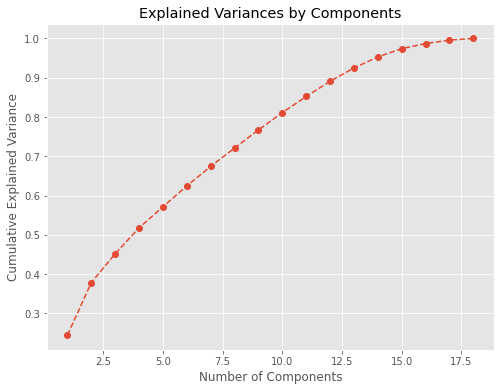

In [31]:
plt.figure(figsize = (8,6))
plt.plot(range(1,19), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variances by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [32]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  8


**Insights**:
-  We can see that out of the **18** original features, we reduced the number of features through principal components to **8**, these components explain more than **70%** of the original variance.
- So that is about **56%** reduction in the dimensionality with a loss of **30%** in variance.
- Let us now look at these principal components as a linear combination of original features.

In [34]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
data_pca = pd.DataFrame(np.round(pca.components_[:8,:],2),index=pc_comps,columns=data_scaled.columns)   
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
age,-0.16,0.45,0.13,-0.41,0.12,-0.01,0.01,-0.13
height_cm,-0.05,0.53,-0.23,0.38,-0.14,-0.01,-0.05,0.08
weight_kg,0.12,0.51,-0.12,0.44,-0.15,-0.00,-0.05,0.08
monthly_income_usd,-0.25,0.40,0.09,-0.38,0.08,-0.03,-0.04,-0.15
motivation_for_workingout,-0.43,-0.05,-0.03,0.03,-0.00,-0.03,-0.03,0.04
gender_encoded,0.08,0.04,-0.19,0.18,0.81,-0.46,0.11,-0.17
previously_joined_gym_encoded,-0.35,-0.07,-0.09,-0.00,-0.02,-0.07,-0.03,0.08
level_of_fittness_encoded,0.31,0.02,-0.39,-0.27,-0.04,0.00,0.01,-0.06
frequency_of_work_out_encoded,0.23,0.04,0.09,-0.02,-0.08,0.09,0.22,-0.29
followed_exercise_plan_before_encoded,-0.29,-0.04,-0.08,0.00,0.01,-0.12,0.00,-0.03


In [37]:
def color_high(val):
    if val <= -0.31: 
        return 'background: lightgreen'
    elif val >= 0.31:
        return 'background: lightblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
age,-0.160000,0.450000,0.130000,-0.410000,0.120000,-0.010000,0.010000,-0.130000
height_cm,-0.050000,0.530000,-0.230000,0.380000,-0.140000,-0.010000,-0.050000,0.080000
weight_kg,0.120000,0.510000,-0.120000,0.440000,-0.150000,-0.000000,-0.050000,0.080000
monthly_income_usd,-0.250000,0.400000,0.090000,-0.380000,0.080000,-0.030000,-0.040000,-0.150000
motivation_for_workingout,-0.430000,-0.050000,-0.030000,0.030000,-0.000000,-0.030000,-0.030000,0.040000
gender_encoded,0.080000,0.040000,-0.190000,0.180000,0.810000,-0.460000,0.110000,-0.170000
previously_joined_gym_encoded,-0.350000,-0.070000,-0.090000,-0.000000,-0.020000,-0.070000,-0.030000,0.080000
level_of_fittness_encoded,0.310000,0.020000,-0.390000,-0.270000,-0.040000,0.000000,0.010000,-0.060000
frequency_of_work_out_encoded,0.230000,0.040000,0.090000,-0.020000,-0.080000,0.090000,0.220000,-0.290000
followed_exercise_plan_before_encoded,-0.290000,-0.040000,-0.080000,0.000000,0.010000,-0.120000,0.000000,-0.030000


**Insights**

- The first principal component which explains less than **30%** of the variance, PC1, is a measure of level of fitness. PC1 is associated with a high score of this variable,as this variable has positive weight, it has much influence in this PCA. PC1 is associated with low values of other features, which have less influence in this PCA (motivation for working out, previously joined gym, and athletics food supplements).It seems this principal component captures only fitness of a person..

- The second principal component, PC2 which explains less than **40%** of the variance, is a measure of age, height (cm), weight (kg), and monthly income (usd), as these variables have positive weights and have much influence in this PCA. PC2 is associated with low values of other features , which have less influence in this PCA. This principal component mostly captures the physical attributes that define a person..

- The eight principal component which explains at least **70%** of the variance, PC8, is a measure of sleeping habits, as this variable has positive weight, thus has much influence in this PCA. PC8 is associated with low values of other features, which have less influence in this PCA. This principal component seems to capture only the sleeping habits of a person..

#### We can also visualize the data in 2 dimensions using first two principal components 

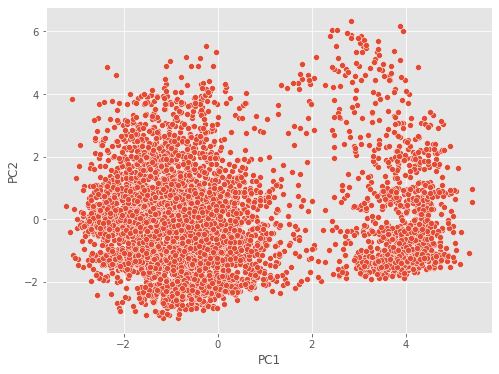

In [38]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

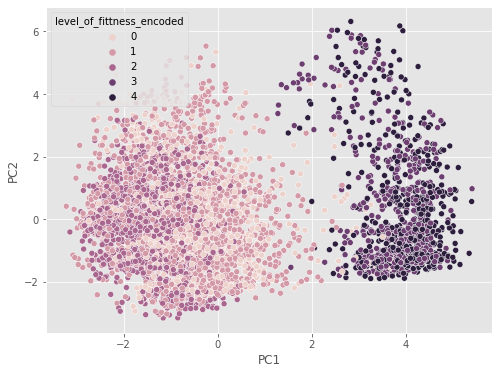

In [39]:
df_concat = pd.concat([data_pca1, df], axis=1)

plt.figure(figsize = (8,6))
sns.scatterplot(x = 0, y=1, data = df_concat, hue='level_of_fittness_encoded')
plt.xlabel('PC1')
plt.ylabel('PC2');

**Summary**

- We can see there are 2 groups:
    - One with Average, Good and Perfect level of fitness.
    - One with Poor and Unfit level of fitness.
- However, the distinction between the groups is not strong and there are some overlaps.

## 3. Clustering

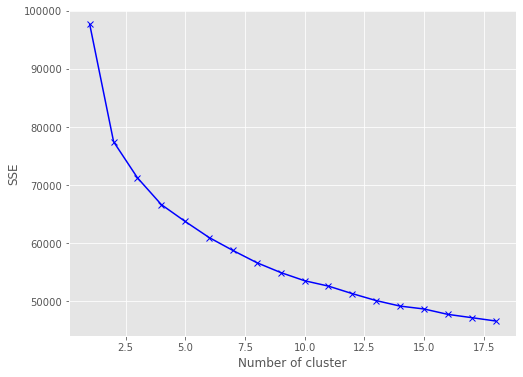

In [40]:
sse = {} 

for k in range(1, 19):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_ 

plt.figure(figsize = (8,6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

**Insights**

- We can see from the plot that there is a consistent dip from 2 to 10 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 10 as our # of clusters. 
- So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

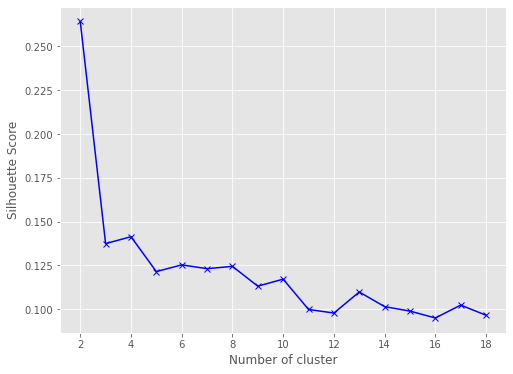

In [41]:
sc = {} 

for k in range(2, 19):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

plt.figure(figsize = (8,6))
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.show()

**Insight**

- We can see from the plot that silhouette score is highest for k=4. Well that makes it slightly easy for us and we can start with first understanding these 4 clusters. So let's take the number of clusters as 4.

### 1. K-means Clusters

In [42]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_scaled)

data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
df1['KMeans_Labels'] = kmeans.predict(data_scaled)

In [43]:
df1['KMeans_Labels'].value_counts()

3    2154
2    1737
1     985
0     547
Name: KMeans_Labels, dtype: int64

In [44]:
mean = df1.groupby('KMeans_Labels').mean()
median = df1.groupby('KMeans_Labels').median()

In [45]:
mean.style.highlight_max(color='#FA8072')

,athlete_id,age,height_cm,weight_kg,monthly_income_usd,smoker,motivation_for_workingout
KMeans_Labels,,,,,,,
0,125240.561243,41.480804,180.561243,85.062157,96891.248629,0.345521,3.063985
1,125794.870051,22.260914,166.158376,76.966497,17335.299492,0.250761,1.286802
2,122235.770869,22.510075,165.062752,69.414508,27996.402994,0.310881,3.522165
3,72481.107707,30.551068,171.844011,69.944290,75714.634633,0.026462,3.998607


In [46]:
mean.style.highlight_min(color='#EECFA1')

,athlete_id,age,height_cm,weight_kg,monthly_income_usd,smoker,motivation_for_workingout
KMeans_Labels,,,,,,,
0,125240.561243,41.480804,180.561243,85.062157,96891.248629,0.345521,3.063985
1,125794.870051,22.260914,166.158376,76.966497,17335.299492,0.250761,1.286802
2,122235.770869,22.510075,165.062752,69.414508,27996.402994,0.310881,3.522165
3,72481.107707,30.551068,171.844011,69.944290,75714.634633,0.026462,3.998607


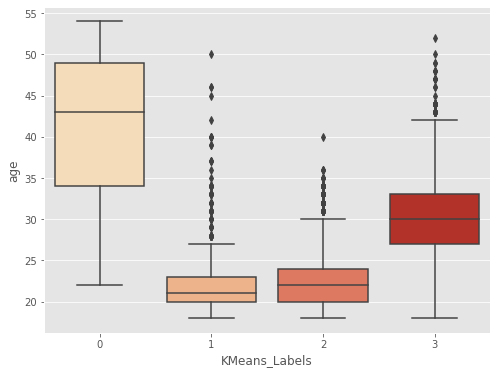

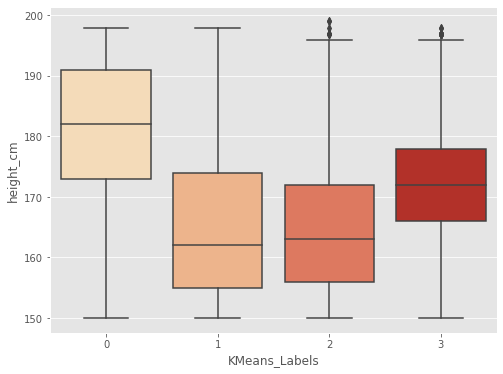

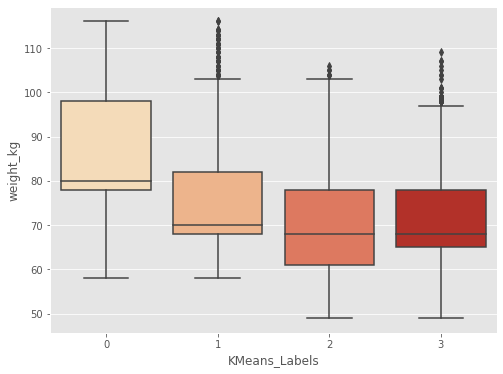

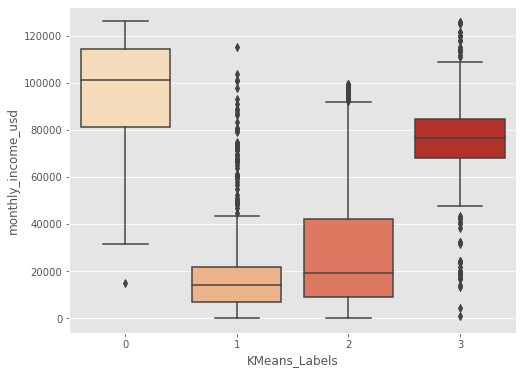

In [47]:
cols_visualise = ['age', 'height_cm', 'weight_kg', 'monthly_income_usd']

for col in cols_visualise:
    plt.figure(figsize = (8,6))
    sns.boxplot(x = 'KMeans_Labels', y = col, data = df1, palette='OrRd')
    plt.show()

 **Insights**

As observed from the box wishker plot:

- Clusters 1, 2, and 3 are having outliers in age, weight (kg), monthly income (usd)..
- Clusters 2 and 3 both have a few outliers in the height (cm)..
- Also, clusters 0, 1 and 2 having a few outliers in the motivation for working out..

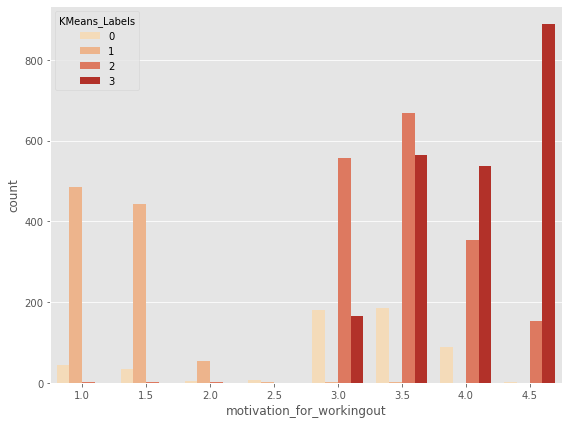

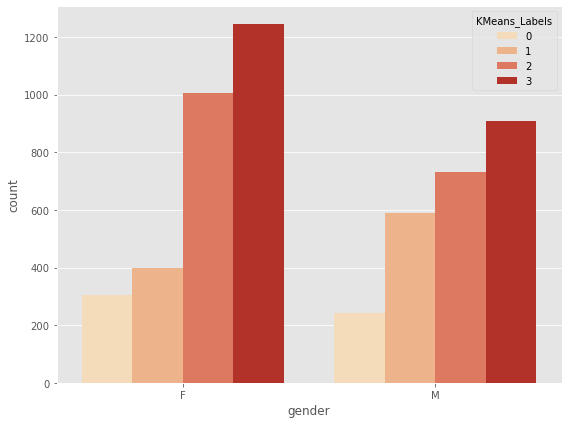

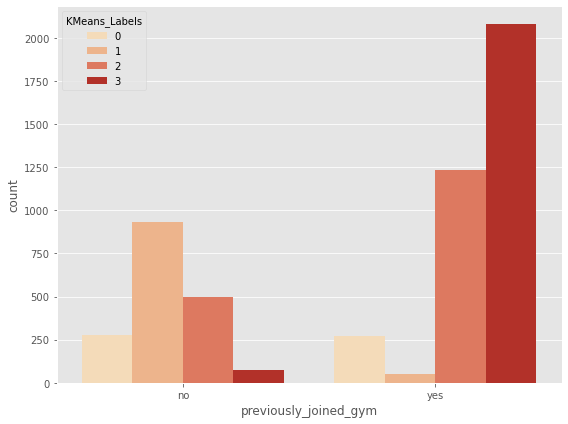

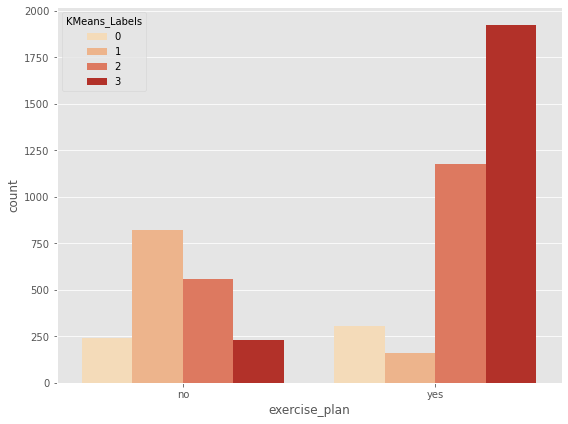

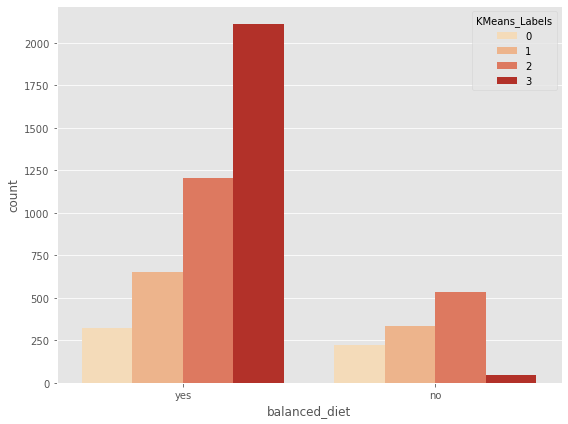

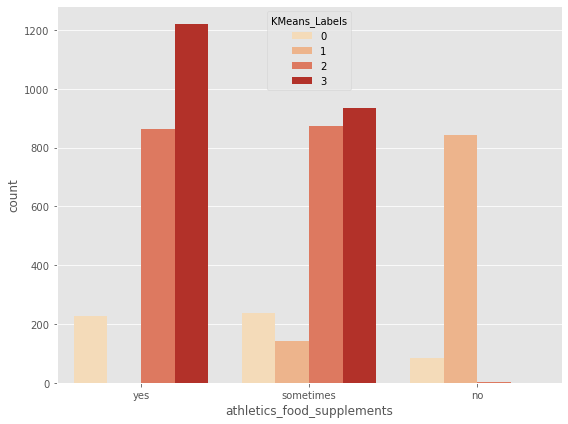

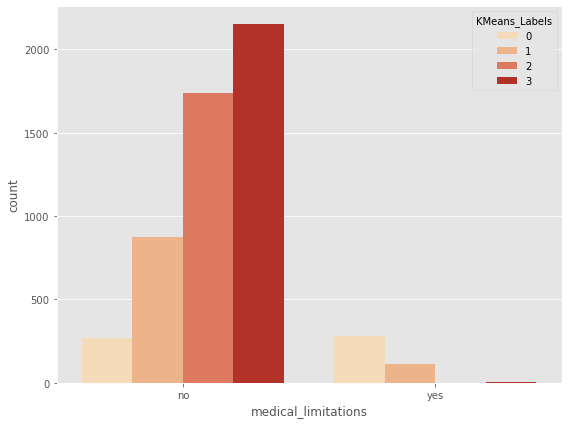

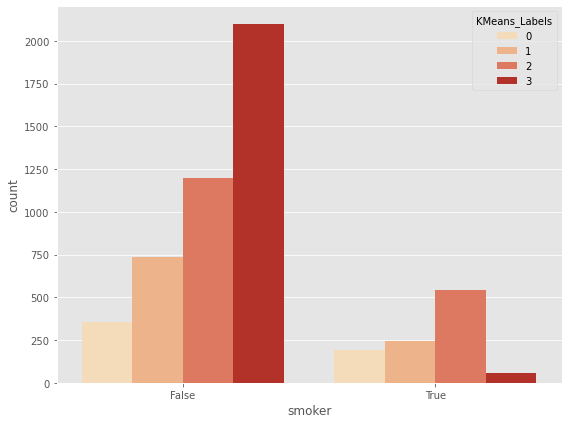

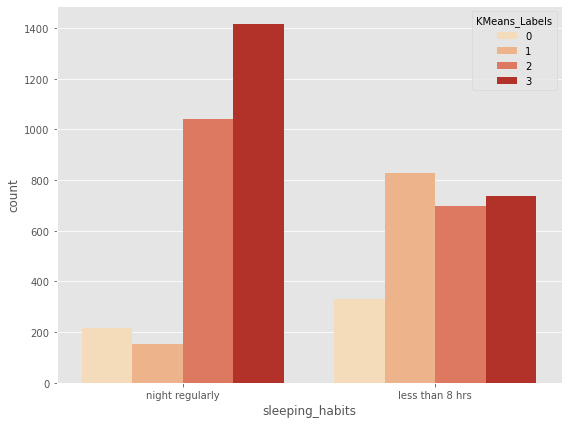

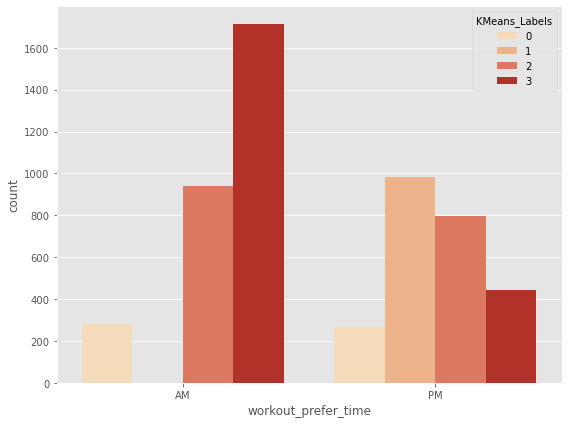

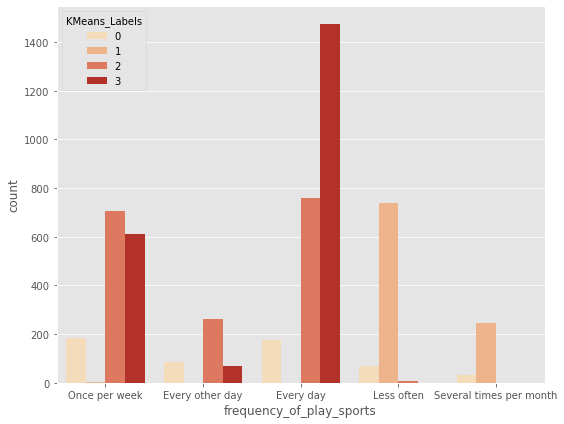

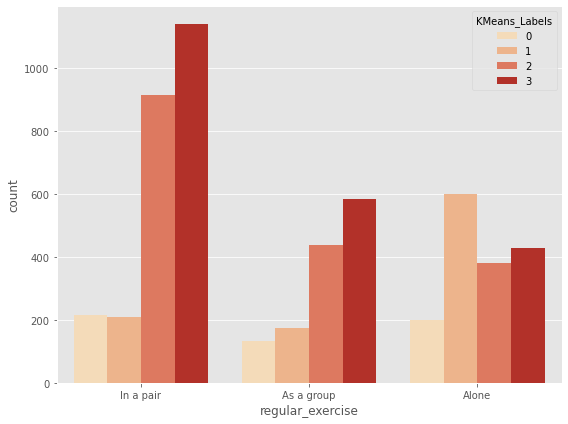

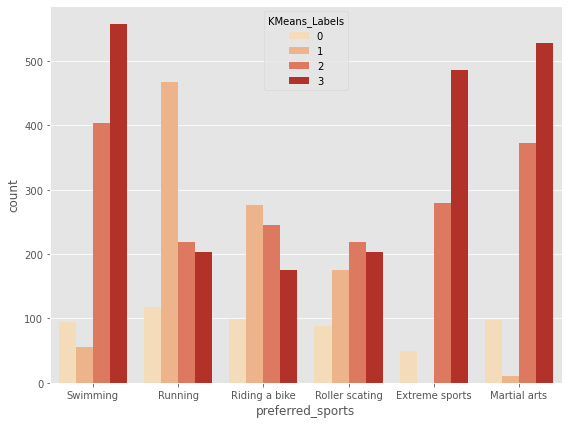

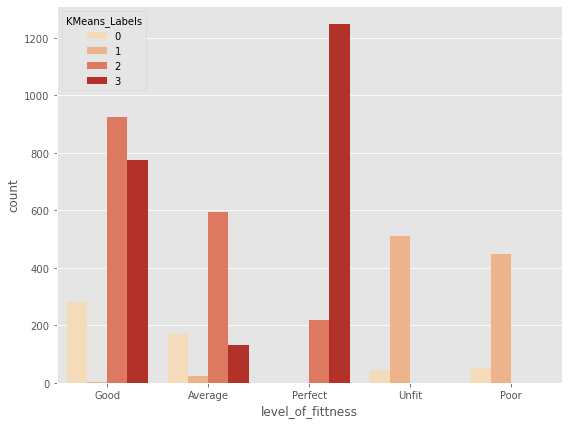

In [48]:
cols = ['motivation_for_workingout', 'gender', 'previously_joined_gym', 'exercise_plan',
             'balanced_diet', 'athletics_food_supplements', 'medical_limitations', 'smoker',
             'sleeping_habits', 'workout_prefer_time', 'frequency_of_play_sports', 'regular_exercise',
             'preferred_sports', 'level_of_fittness']

for col in cols:
    plt.figure(figsize = (8,6))
    sns.countplot(x = col, hue='KMeans_Labels', data = df1, palette='OrRd')
    plt.tight_layout()
    plt.show()

**Insights**

As we can observe from the count plot:
- Clusters 0 and 1 having lowest motivation scores, while clusters 2 and 3 having the highest motivation scores..
- Clusters 0 and 2 having a less of both genders, while clusters 2 and 3 having a more of both genders, and that's not surprising due to there being more observations in these clusters..
- Clusters 0 and 1 are the lowest to join the gym before, while clusters 2 and 3 are the most to join the gym before..
- Clusters 0, 1 are a mix of the poor and unfit shape and mid- fitted shape individuals, while clusters 2 and 3 have the perfect, good and average fitted shaped individuals..
- Clusters 0 and 1 tend to not work out that much, while clusters 2 and 3 tend to work out a lot..
- Clusters 0 and 1 are very less likely to follow an exercise plan, while clusters 2 and 3 are very much likely to follow an exercise plan..
- All clusters are much likely to follow a balanced diet..
- Cluster 1 usually do not eat athletics food supplements, while clusters 0, 2 and 3 usually eat athletics food supplements..
- All clusters having healthy individuals and non-smokers..
- Clusters 0 and 1 tend to sleep less than 8 hrs, while clusters 2 and 3 tend to sleep at night hrs..
- Cluster 1 prefer to work out during the evening period, while cluster 3 prefer to work out during the morning hours, and clusters 0 andd 2 prefer to work out during the morning or evening hours..
- Cluster 1 prefer to work out alone, while clusters 2 and 3 prefer to work out within a group or with a partner or even alone, and cluster 0 prefer to work out alone or with a partner..
- Clusters 0 and 1 prefer sports like: running, riding a bike and roller skating which require less effort, while clusters 2 and 3 prefer sports like : extreme sports, swimming and martial arts..

*Will try other algorithms to see if we can do better.*

### **Clustering Profiles**

#### # Cluster 0
- **Good and average fitted, enthusiastic and unenthusiastic to workout, and mid-workout routine**: most of them mid-aged (in thirties and above) individuals with less of the young, older millennials, freshers and non-freshers in the gym, tend to follow a healthy diet and eat athletics food supplements, tend to be healthy and non-smokers, most likely they sleeping less than 8 hrs and workout during the morning or evening time, prefer to workout alone or with a partner, prefer all kind of sports, but less likely to prefer extreme sports..

#### # Cluster 1

- **Poorly or unfitted, not enthusiastic to workout, and lazy to workout**: most of them young millennials with less of mid-aged (in thirties and above) individuals, gym beginners, tend to follow a healthy diet and most of the time they do not eat athletics food supplements, tend to be healthy and non-smokers, sleeping less than 8 hrs and they workout during the evening time, prefer workout alone and effortless sports..

#### # Cluster 2

- **Average and good fitted, enthusiastic to workout, and workout the most frequently**: most of them young millennials with a few of older millennials, non-freshers in the gym, eat healthy and usually eat athletics food supplements, tend to be healthy and non-smokers, most likely they sleeping at night hrs and workout during the morning or evening time, prefer to workout with a partner and prefer sports like : swimming, martial arts, and they don't mind to play the extreme sports ..

#### # Cluster 3

- **Perfect fitted, very enthusiastic to workout, and workout almost all the days**: most of them are older millennials, gym geeks, eat healthy and always eat athletics food supplements, tend to be healthy and non-smokers, sleeping at night hrs and workout during the morning hours, prefer to workout with a partner or within group or even alone, and prefer sports like : extreme sports, martial arts and especially swimming..

### 2. K-Medoids Clusters

In [49]:
kmedo = KMedoids(n_clusters = 4, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
df1['kmedoLabels'] = kmedo.predict(data_scaled)

In [50]:
df1.kmedoLabels.value_counts()

3    1820
2    1460
1    1216
0     927
Name: kmedoLabels, dtype: int64

In [51]:
mean_kmed = df1.groupby('kmedoLabels').mean()
median_kmed = df1.groupby('kmedoLabels').median()

In [52]:
mean_kmed.style.highlight_max(color='#FA8072')

,athlete_id,age,height_cm,weight_kg,monthly_income_usd,smoker,motivation_for_workingout,KMeans_Labels
kmedoLabels,,,,,,,,
0,80638.580367,26.208198,164.131607,62.636462,53456.920173,0.069040,4.114887,2.595469
1,125642.770559,24.251645,167.932566,78.308388,25892.004112,0.263980,1.526727,1.011513
2,108716.042466,27.325342,174.005479,77.104110,53890.123973,0.216438,3.600342,2.149315
3,95935.922527,30.683516,169.722527,70.173077,67074.195055,0.182418,3.707143,2.278571


In [53]:
mean_kmed.style.highlight_min(color='#EECFA1')

,athlete_id,age,height_cm,weight_kg,monthly_income_usd,smoker,motivation_for_workingout,KMeans_Labels
kmedoLabels,,,,,,,,
0,80638.580367,26.208198,164.131607,62.636462,53456.920173,0.069040,4.114887,2.595469
1,125642.770559,24.251645,167.932566,78.308388,25892.004112,0.263980,1.526727,1.011513
2,108716.042466,27.325342,174.005479,77.104110,53890.123973,0.216438,3.600342,2.149315
3,95935.922527,30.683516,169.722527,70.173077,67074.195055,0.182418,3.707143,2.278571


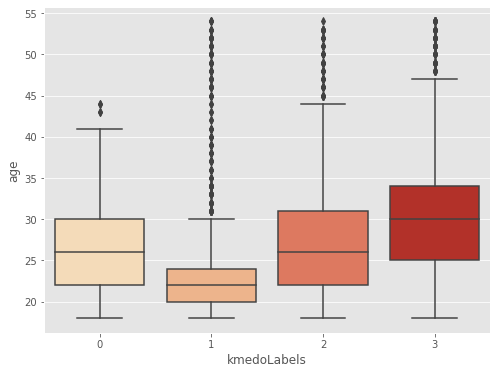

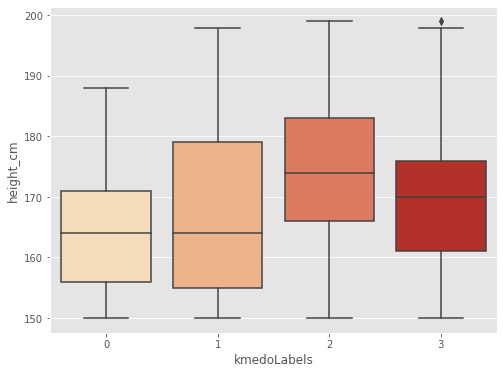

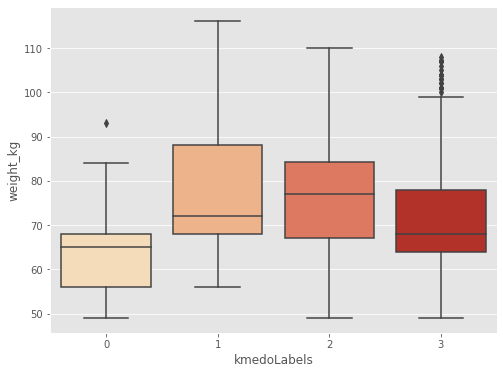

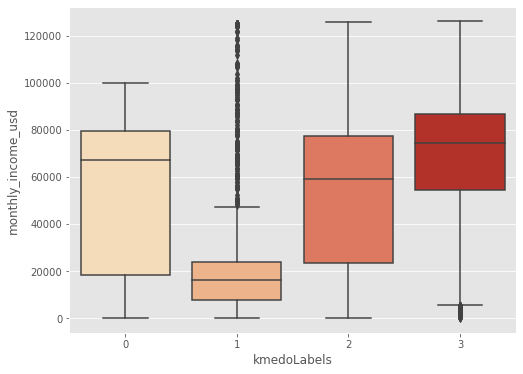

In [54]:
for col in cols_visualise:
    plt.figure(figsize = (8,6))
    sns.boxplot(x = 'kmedoLabels', y = col, data = df1, palette='OrRd')
    plt.show()

**Insights**

- Clusters 0, 1, 2, and 3 having outliers in the age..

- Clusters 0 and 3 having outliers in the weight kg..

- Cluster 3 has an outlier in the height cm..

- Clusters 1 and 3 having outliers in the monthly income (USD)..

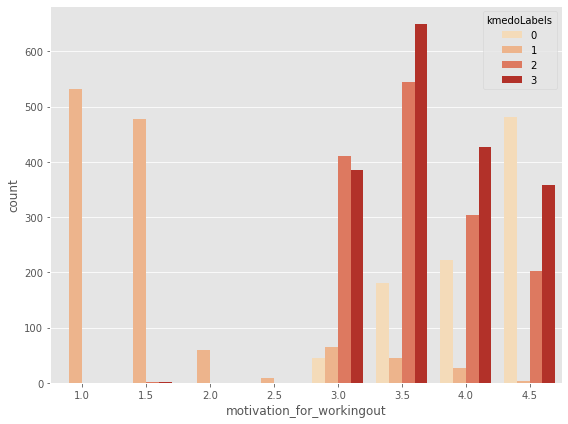

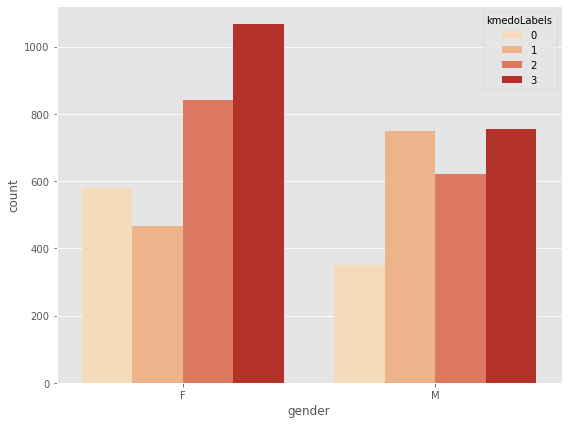

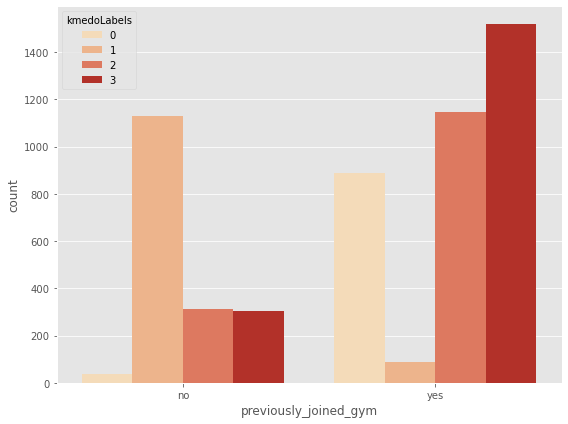

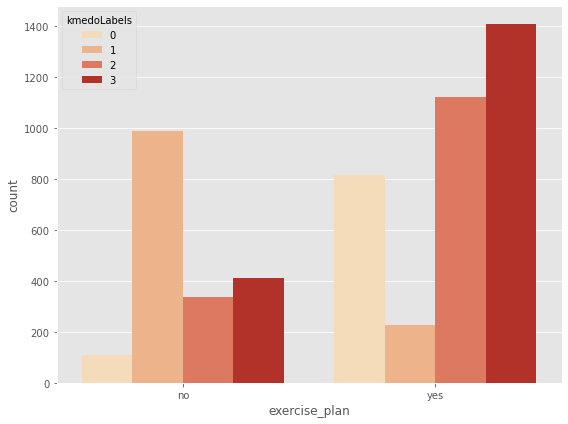

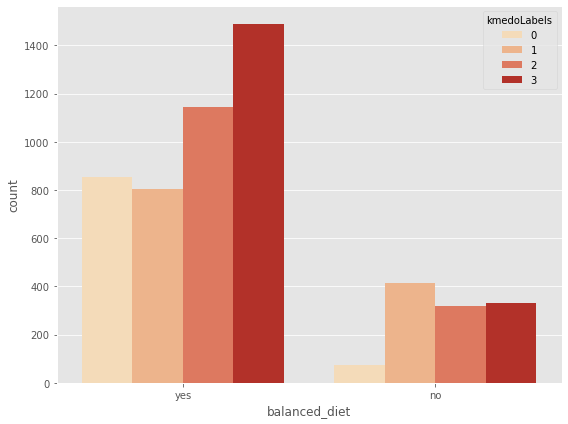

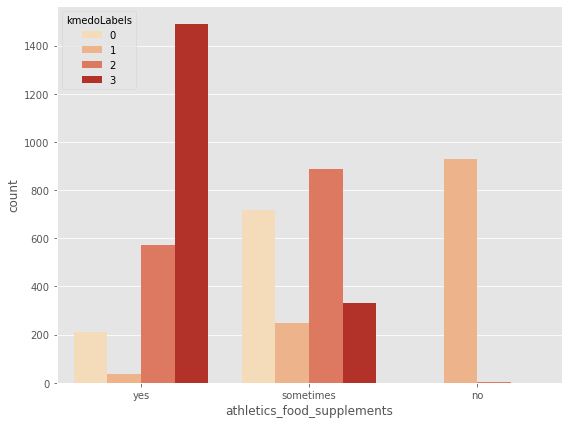

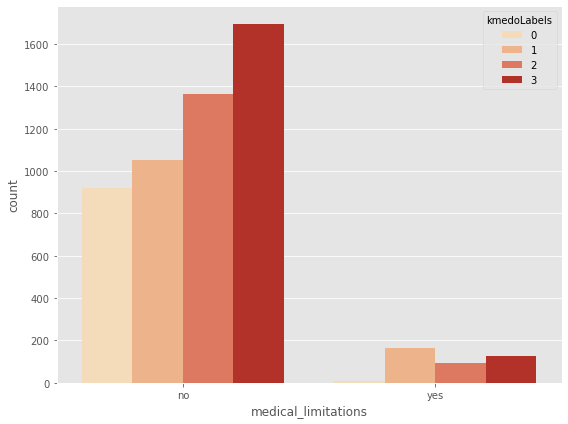

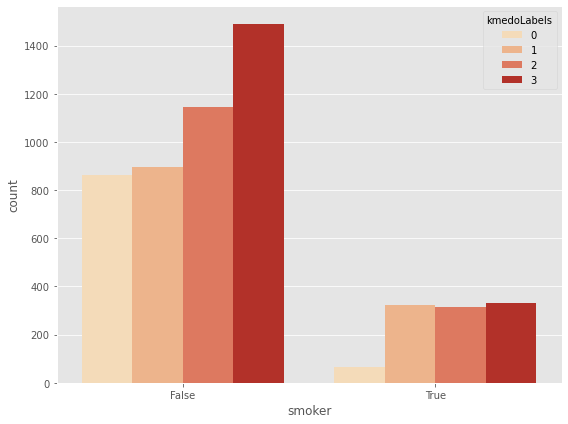

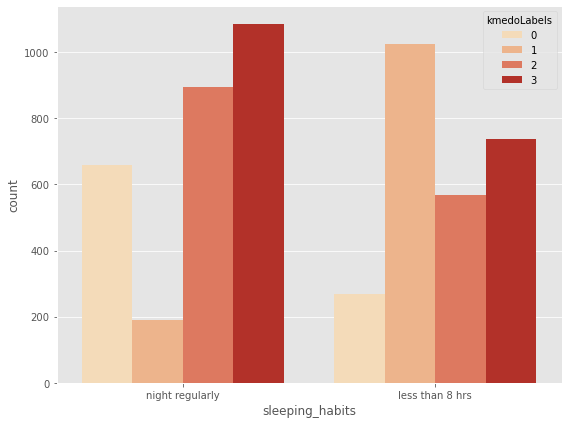

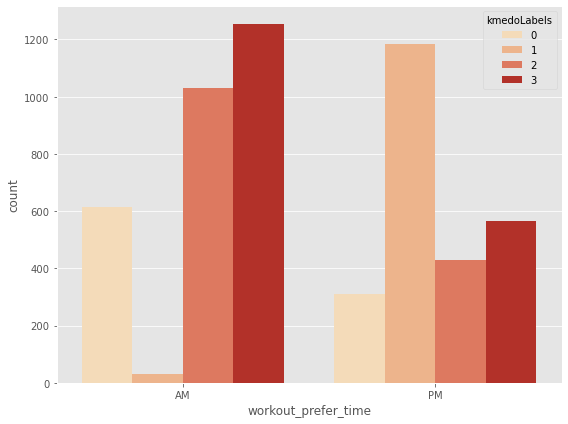

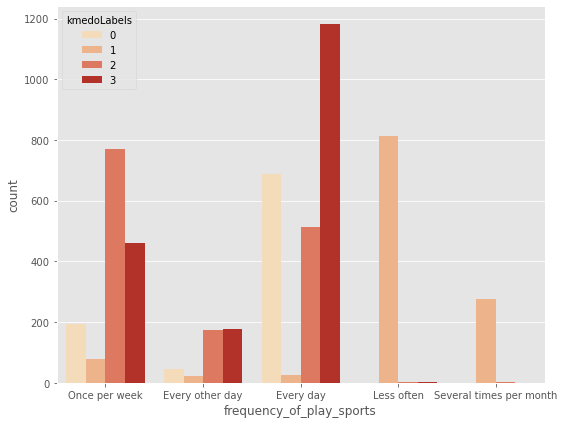

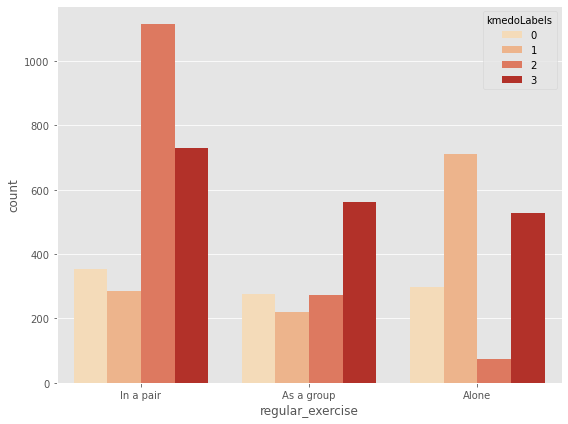

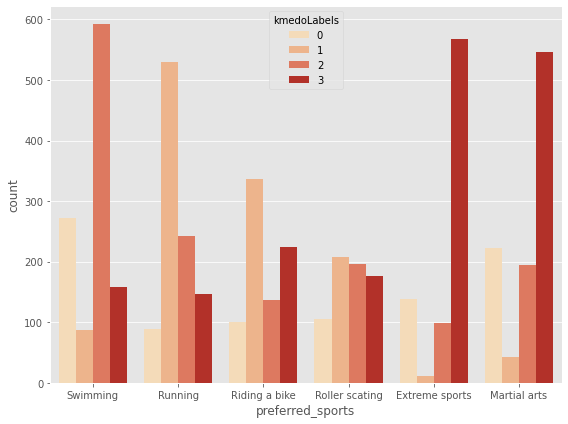

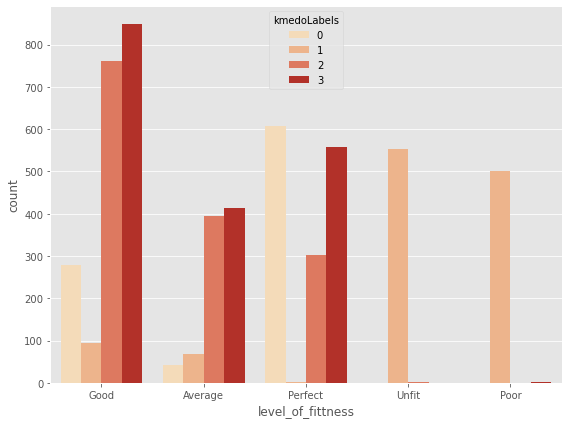

In [55]:
for col in cols:
    plt.figure(figsize = (8,6))
    sns.countplot(x = col, hue='kmedoLabels', data = df1, palette='OrRd')
    plt.tight_layout()
    plt.show()

**Insights**

As we can observe from the count plot:

- Clusters 0 has the lowest motivation scores, while clusters 1, 2 and 3 having the high motivation scores..
- Clusters 0 and 2 having a less of both genders, while clusters 2 and 3 having a more of both genders, and that's not surprising due to there being more observations in these clusters..
- Cluster 1 is the lowest to join the gym before, while clusters 0, 2 and 3 are the most to join the gym before..
- Cluster 1 is very less likely to follow an exercise plan, while clusters 0, 2 and 3 are very much likely to follow an exercise plan..
- All clusters are much likely to follow a balanced diet..
- Cluster 1 usually does not eat athletics food supplements, while cluster 3  eats athletics food supplements, and cluster 0 and 2 sometimes eat athletics food supplements..
- All clusters having healthy individuals and non-smokers..
- Cluster 1 tends to sleep less than 8 hrs, while clusters 0, 2 and 3 tend to sleep at night hrs..
- Cluster 1 prefers to work out during the evening period, while clusters 0, 2 and 3 prefer to work out during the morning hours..
- Cluster 1 tends to not work out that much, while clusters 0, 2 and 3 tend to work out a lot..
- Cluster 1 prefers to work out alone, while clusters 0, 2 and 3 prefer to work out within a group or with a partner..
- Cluster 1 prefers sports like: running, riding a bike and roller skating which require less effort, while clusters 0, 2 and 3 prefer sports like : extreme sports, swimming and martial arts..
- Cluster 1 are a mix of the poor or unfit shape shape individuals, while clusters 2 and 3 have the good and average fitted shaped individuals, cluster 0 has the perfect fitted shaped people the most..

### **Clustering Profiles**

#### # Cluster 0
- **Perfect-fitted, motivated to workout,workout the most frequently**: most of them young, older millennials with less of the mid-aged individuals, non-freshers in the gym, eat healthy and sometimes eat athletics food supplements, tend to be healthy and non-smokers,sleeping at night hrs and workout during the morning hours, prefer to workout within a group or with a partner, prefer sports like : extreme sports, swimming and martial arts..

#### # Cluster 1

- **Poorly or unfitted, not enthusiastic to workout, and lazy to workout**: most of them older millennials and mid-aged (in thirties and above) individuals, gym beginners, eat healthy and usually do not eat athletics food supplements, tend to be healthy and non-smokers, sleeping less than 8 hrs and they workout during the evening time, prefer workout alone and effortless sports..

#### # Cluster 2

- **Average and good fitted, enthusiastic to workout, and workout the most frequently**: most of them young and older millennials and a few of the mid-aged individuals, non-freshers in the gym, eat healthy and sometimes eat athletics food supplements, tend to be healthy and non-smokers, sleeping at night hrs and workout during the morning hours, prefer to workout with a partner and prefer sports like : extreme sports, martial arts, and especially swimming ..

#### # Cluster 3

- **Good and perfect fitted, the most enthusiastic to workout, and workout alomst all the days**: most of them are older millennials individuals, gym geeks, eat healthy and always eat athletics food supplements, tend to be healthy and non-smokers, tend to be healthy and non-smokers, sleeping at night hrs and workout during the morning hours, prefer to workout with a partner , or within group or even alone, and prefer sports like : swimming, martial arts and especially extreme sports..

### 3. Gaussian Mixture Clusters

In [56]:
gmm = GaussianMixture(n_components = 4, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
df1['GmmLabels'] = gmm.predict(data_scaled)

In [57]:
df1.GmmLabels.value_counts()

1    2678
2    1428
0    1004
3     313
Name: GmmLabels, dtype: int64

In [58]:
mean_gmm = df1.groupby('GmmLabels').mean()
median_gmm = df1.groupby('GmmLabels').median()

In [59]:
mean_gmm.style.highlight_max(color='#FA8072')

,athlete_id,age,height_cm,weight_kg,monthly_income_usd,smoker,motivation_for_workingout,KMeans_Labels,kmedoLabels
GmmLabels,,,,,,,,,
0,125808.003984,22.498008,166.675299,77.581673,18399.905378,0.255976,1.284363,0.981076,1.000000
1,81421.655713,28.266617,170.436520,69.150485,61283.721060,0.000000,3.963966,2.712845,1.812547
2,124159.813725,27.094538,168.003501,73.166667,48490.362045,0.478291,3.387955,1.859944,2.158263
3,125251.533546,40.086262,177.696486,83.115016,95713.453674,0.297125,2.976038,0.047923,2.095847


In [60]:
mean_gmm.style.highlight_min(color='#EECFA1')

,athlete_id,age,height_cm,weight_kg,monthly_income_usd,smoker,motivation_for_workingout,KMeans_Labels,kmedoLabels
GmmLabels,,,,,,,,,
0,125808.003984,22.498008,166.675299,77.581673,18399.905378,0.255976,1.284363,0.981076,1.000000
1,81421.655713,28.266617,170.436520,69.150485,61283.721060,0.000000,3.963966,2.712845,1.812547
2,124159.813725,27.094538,168.003501,73.166667,48490.362045,0.478291,3.387955,1.859944,2.158263
3,125251.533546,40.086262,177.696486,83.115016,95713.453674,0.297125,2.976038,0.047923,2.095847


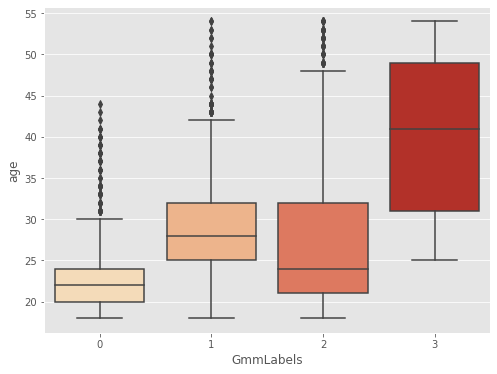

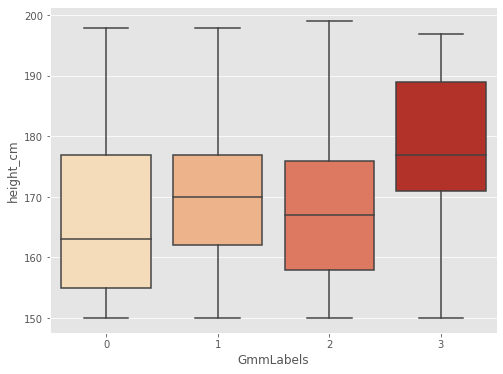

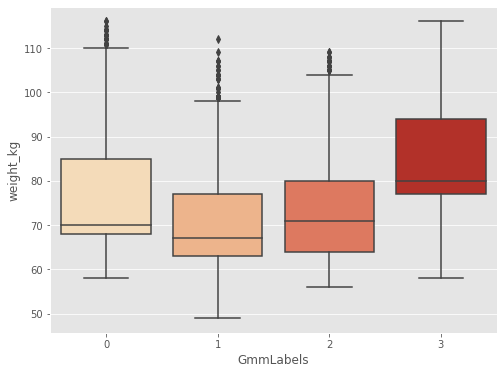

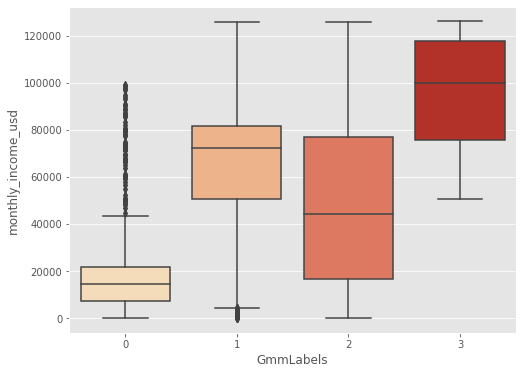

In [61]:
for col in cols_visualise:
    plt.figure(figsize = (8,6))
    sns.boxplot(x = 'GmmLabels', y = col, data = df1, palette='OrRd')
    plt.show()

**Insights**

- Cluster 0 , 1 and 2 have an ouliers in the age and the weight (kg).
- Only cluster 0 has an outliers in the monthly income (USD).

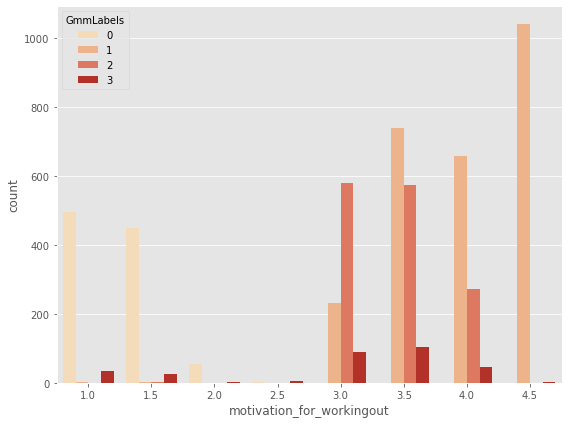

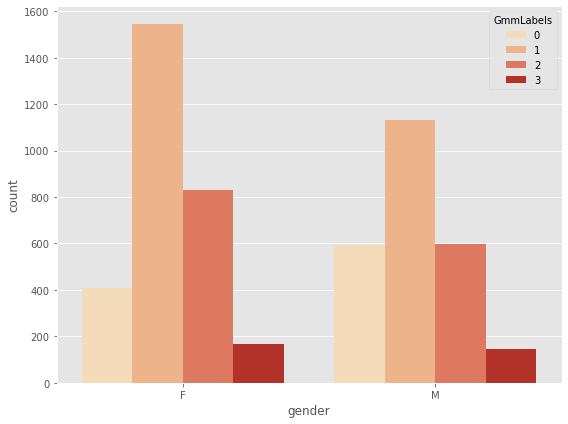

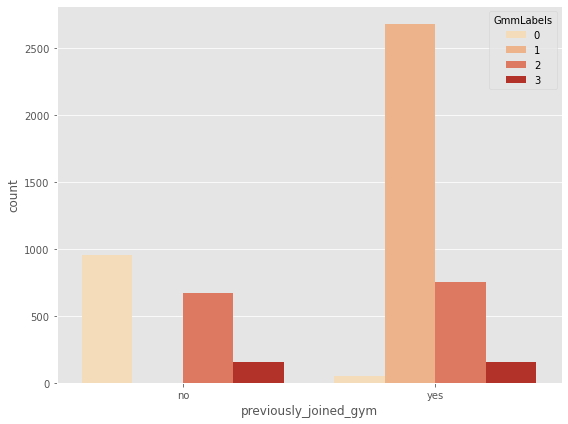

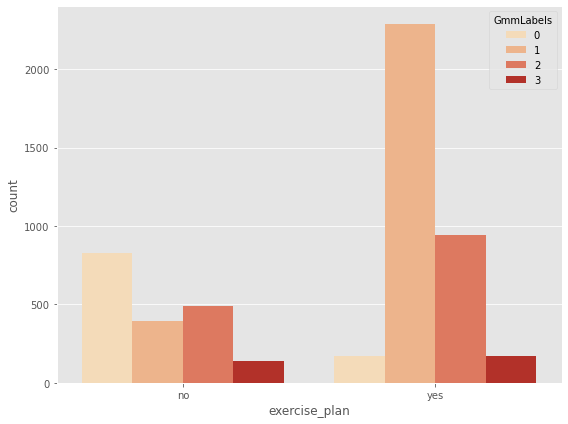

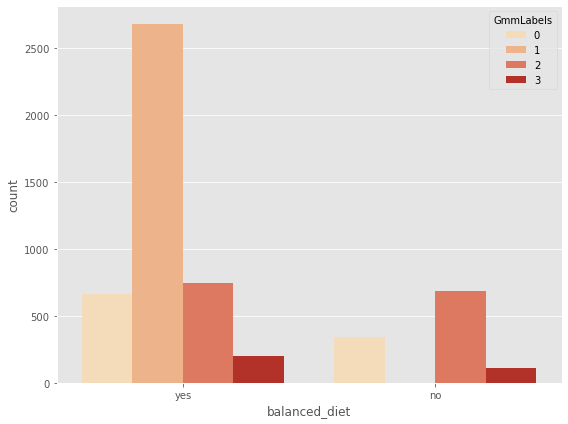

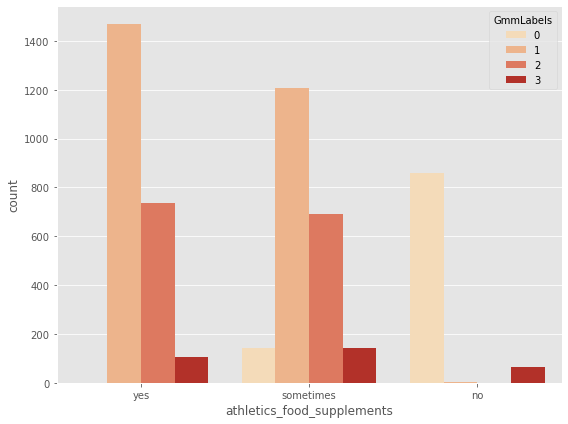

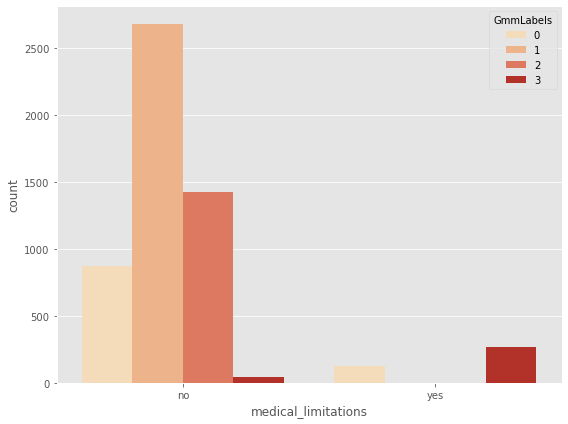

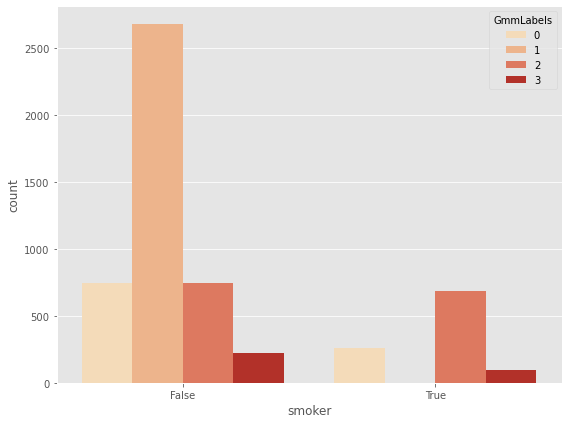

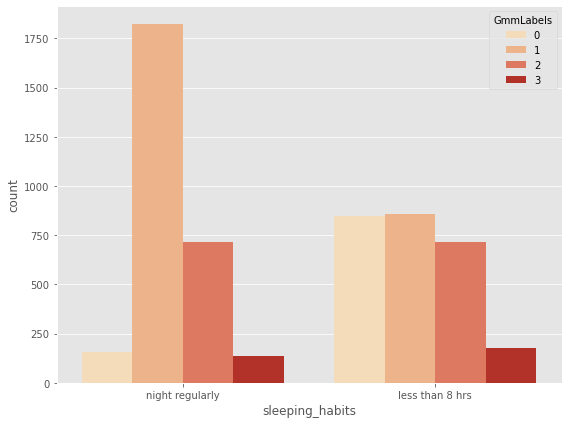

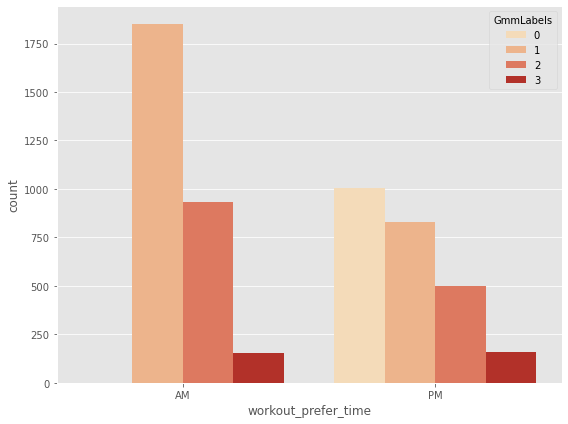

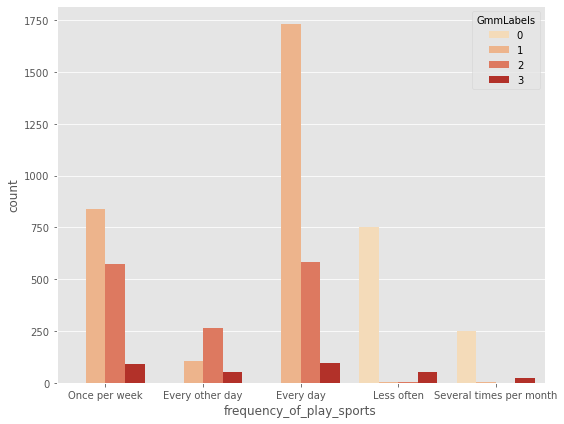

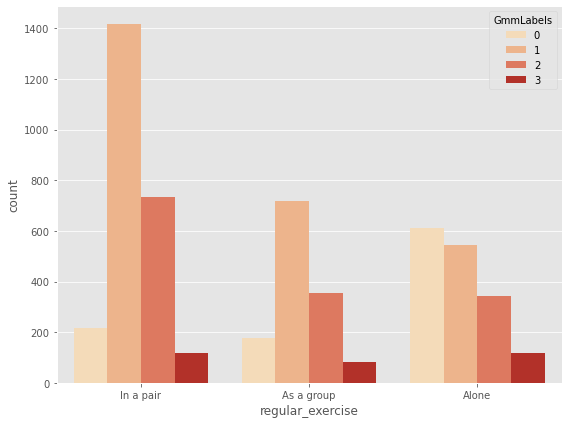

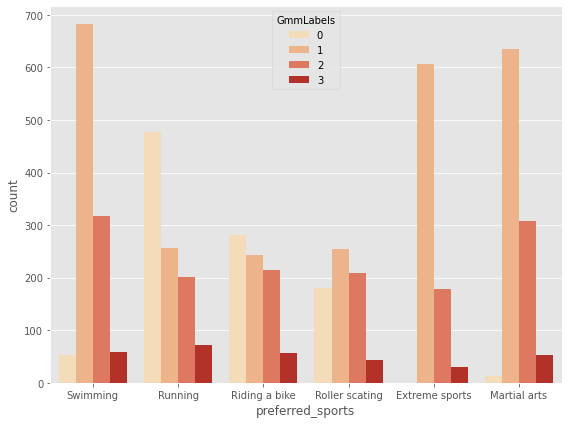

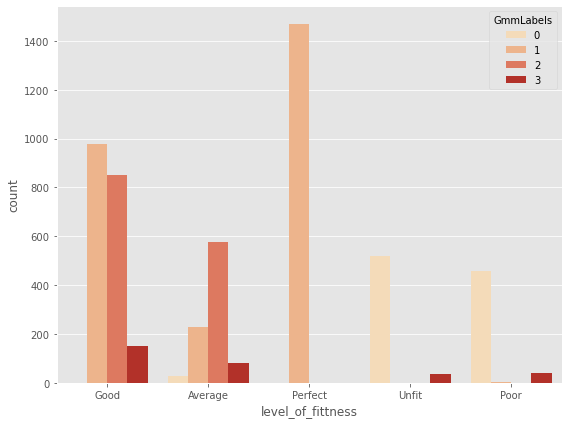

In [62]:
for col in cols:
    plt.figure(figsize = (8,6))
    sns.countplot(x = col, hue='GmmLabels', data = df1, palette='OrRd')
    plt.tight_layout()
    plt.show()

**Insights**

As we can observe from the count plot:
- Cluster 0 has the lowest motivation scores, cluster 1 and 2 have high motivation scores, while cluster 3 has a mix of all scores..
- Cluster 0 is the lowest of the join to the gym before, and cluster 1 is the highest of the join to the gym before, while clusters 2 and 3 are a mix of both..
- Cluster 0, 2 and 3 are a mix of the individuals who follow a healthy diet, and cluster 1 follow a healthy diet all the time..
- Cluster 0 usually does not eat athletics food supplements, and clusters 1 and 2 usually eat athletics food supplements, while cluster 3 is less likely to eat athletics food supplements..
- Only clusters 0 and 3 have medical limitations..
- Only in cluster 1 are non-smokers..
- Cluster 0 is less likely to sleep at night, and cluster 1 is more likely to sleep at night, while clusters 2 and 3 are a mix of both..
- Cluster 0 prefers to work out in the evening time , and cluster 1 is more likely to work out in the morning time, while clusters 3 and 4 are a mix of both..
- Cluster 0 is less likely to workout, and cluster 1 is more likely to workout, while clusters 2 and 3 are mid-workout..
- Cluster 0 prefers to workout alone, and cluster 1 prefers to workout within a group or with a partner or even alone, and clusters 2 and 3 prefer to workout with all options..
- Cluster 0 prefers sports like : running , riding a bike , and roller skating, and cluster 1 prefers sports like : extreme sports, swimming, and martial arts, while clusters 2 and 3 equally prefer all kinds of sports ..
- Cluster 0 is poor and unfit, cluster 1 is good, average and perfect , cluster 2 good and average, and cluster 3 is a mix of all levels..

### **Clustering Profiles**

#### # Cluster 0

- **Poor and unfit, not very much motivated to workout, lazy to work out**: most of them young millennials with a few of the older millennials and mid-aged individuals, gym beginners, tend to follow a healthy diet program and usually does not eat athletics food supplements, tend to be healthy and non-smokers, usually sleeping less than 8 hrs and always work out in the evening time, prefer to work out alone the most, prefer sports don't require a lot of efforts, such as : running, riding a bike and roller skating..

#### #Cluster 1 

- **Prefect and good fitted, the most motivated to workout, work out almost all the days**: most of them older millennials with a few of the young millennials and mid-aged individuals, all of them have gone to the gym before, and follow a healthy diet program, most often they will never forget to eat the athletics food supplements, healthy and non-smokers, tend to sleep at the night and more likely to work out in the morning time, prefer to workout within a group or with a partner or even alone , prefer sports like : extreme sports, swimming, and martial arts the most..

#### #Cluster 2

- **Good and average fitted, motivated to workout, work out most often**: most of them young, older millennials with a few of mid-aged individuals,freshers and non-freshers in the gym, evenly tend to follow a healthy diet or not, most often they will never forget to eat the athletics food supplements, all healthy and a few are smokers, evenly tend to sleep at night or less than 8 hrs, tend to work out in the morning time, prefer to work out with a partner the most or even within a group or alone, prefer all kinds of sports but prefer the martial arts and swimming the most..

#### #Cluster 3

- **Good and average fitted or poor-unfit, motivated and unmotivated to workout, most often or lazy to work out**: most of them older millennials and mid-aged individuals(in late thirties), freshers and non-freshers in the gym, evenly tend to follow a healthy diet or not and eat the athletics food supplements, most of them unhealthy, tend to be smokers, evenly tend to sleep at night or less than 8 hrs, prefer to work out in morning or evening time, prefer to work out with a partner, within a group, and alone, prefer all kinds of sports..

## Conclusions and Recommendations

- **K-means clusters**, overall the k-means algorithm solution doesn't give us uniquely defined characteristics of the potential clusters, the k-means with k=4 suggests that there are 4 groups in this dataset while as we obviously notice that 2 groups of each have much similarity with the other group, also, it's not very useful as it impacted by outliers resulting in 2 very small cluster and 2 very big clusters.

- **K-medoids clusters**, unlike the clusters of K-Means and gaussian mixture, clusters are more evenly distributed, and less affected by outliers in the data, and still retain the overall characteristics of the clusters.

- **Gaussian mixture clusters**, as k-means solution it doesn't give us uniquely defined characteristics of the potential clusters, there are overlaps in the clusters. Also, it's not very useful as it is impacted by outliers resulting in 1 very small cluster and 3 very big clusters.

Choice of algorithm here will depend on the context and use case. But purely based on the foundations of 'what good clustering looks like', we can propose K-Medoids as it has more distinct extreme clusters .